In [42]:
#load the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import os
import seaborn as sns

In [5]:
#import the data
data = pd.read_csv("heart_failure.csv")
pd.set_option('display.max_columns', None)

### Exploratory data analysis EDA

In [50]:
#data exploration
data.head()
#data.info()
#data.describe

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [8]:
#convert columns with  0,1 data into categorical data

data.anaemia = data.anaemia.astype("category")
data.diabetes = data.diabetes.astype("category")
data.high_blood_pressure = data.high_blood_pressure.astype("category")
data.sex = data.sex.astype("category")
data.smoking = data.smoking.astype("category")
data.DEATH_EVENT = data.DEATH_EVENT.astype("category")

In [76]:
import os
#if there is not table_report.txt file, create it
if not os.path.exists("table_report.txt"):
    with open("table_report.txt", "w") as report:
        report.write("Table Report for Heart Failure Dataset\n")
        report.write("=" * 40 + "\n\n")
        
        # Dataset shape
        report.write(f"Number of Rows: {data.shape[0]}\n")
        report.write(f"Number of Columns: {data.shape[1]}\n\n")
        
        # Column names
        report.write("Column Names:\n")
        for col in data.columns:
            report.write(f"- {col}\n")
        
        # Data types
        report.write("\nData Types:\n")
        report.write(data.dtypes.to_string())
        
        # Missing values
        report.write("\n\nMissing Values:\n")
        missing = data.isnull().sum()
        if missing.sum() == 0:
            report.write("There are no missing values in the dataset.\n")
        else:
            for col, count in missing.items():
                if count > 0:
                    report.write(f"{col}: {count} missing values\n")
    
        print(f"Report saved to: {report}")

Report saved to: <_io.TextIOWrapper name='table_report.txt' mode='w' encoding='UTF-8'>


In [77]:
# Check for duplicates

with open("table_report.txt", "a") as report:
    report.write("\n\nDuplicate Rows:\n")
    duplicate_count = data.duplicated().sum()
    if duplicate_count > 0:
        report.write(f"There are {duplicate_count} duplicate rows in the dataset.\n")
    else:
        report.write("There are no duplicate rows in the dataset.\n")

In [27]:
data.info()
#data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       299 non-null    float64 
 1   anaemia                   299 non-null    category
 2   creatinine_phosphokinase  299 non-null    int64   
 3   diabetes                  299 non-null    category
 4   ejection_fraction         299 non-null    int64   
 5   high_blood_pressure       299 non-null    category
 6   platelets                 299 non-null    float64 
 7   serum_creatinine          299 non-null    float64 
 8   serum_sodium              299 non-null    int64   
 9   sex                       299 non-null    category
 10  smoking                   299 non-null    category
 11  time                      299 non-null    int64   
 12  DEATH_EVENT               299 non-null    category
dtypes: category(6), float64(3), int64(4)
memory usage:

In [79]:
# Identify the outliers using the IQR method, but apply only for numerical columns
# Filter numerical columns with float64 and int64 types
numerical_columns = data.select_dtypes(include=["float64", "int64"]).columns

# Calculate IQR for numerical columns
Q1 = data[numerical_columns].quantile(0.25)
Q3 = data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1



# Identify outliers in numerical columns
threshold = 3

outliers = data[((data[numerical_columns] < (Q1 - threshold * IQR)) | (data[numerical_columns] > (Q3 + threshold * IQR))).any(axis=1)]
if not outliers.empty:
    print(f"Number of outliers detected: {len(outliers)}")
    print("Outliers:")
    print(outliers)

#remove the outliers from the data
data_cleaned = data[~((data[numerical_columns] < (Q1 - threshold * IQR)) | (data[numerical_columns] > (Q3 + threshold * IQR))).any(axis=1)]

with open("table_report.txt", "a") as report:
    report.write("\n\nOutliers Report:\n")

    report.write("There are 37 outliers in the datasets when I use the threshold of 3.\n")

Number of outliers detected: 37
Outliers:
      age anaemia  creatinine_phosphokinase diabetes  ejection_fraction  \
1    55.0       0                      7861        0                 38   
9    80.0       1                       123        0                 35   
10   75.0       1                        81        0                 38   
28   58.0       1                        60        0                 38   
31   85.0       0                        23        0                 45   
35   69.0       0                       582        1                 35   
38   60.0       0                      2656        1                 30   
39   60.0       0                       235        1                 38   
48   80.0       1                       553        0                 20   
52   60.0       0                      3964        1                 62   
60   45.0       0                      7702        1                 25   
65   60.0       0                        68        0      

In [86]:
# what is the distibution of the death event in the dataset?

death_event_distribution = data["DEATH_EVENT"].value_counts()
print(death_event_distribution)

with open("table_report.txt", "a") as report:
    report.write("\n\nDeath Event Distribution:\n")
    report.write(f"\n{death_event_distribution.to_string()}\n")
    report.write("There is uneven distribution of the death event in the dataset.\n")

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64


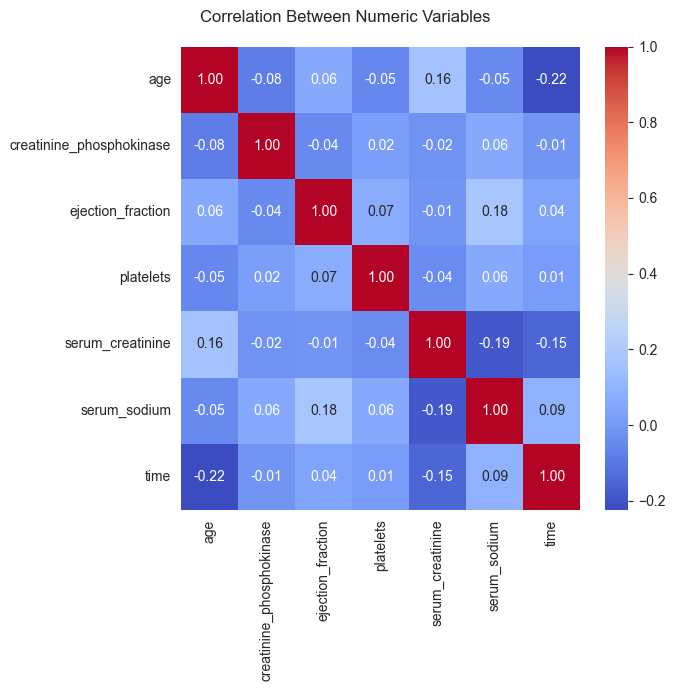

In [88]:


# how are the data variables correlated with each other?
# Plotting the correlation matrix

ouput_folder = "plots"
plt.figure(figsize=(7, 7))
numeric_data = data.select_dtypes(include=["int64", "float64"]).columns
sns.heatmap(data[numeric_data].corr(), annot=True, cmap = "coolwarm", fmt = "0.2f", cbar = True,  linewidths=0)
plt.suptitle("Correlation Between Numeric Variables")
plt.tight_layout()
filepath = os.path.join(ouput_folder, "correlation_matrix.png")
plt.savefig(filepath, dpi = 300, bbox_inches = "tight")
plt.show()


- There is no correlation between the numerich variables

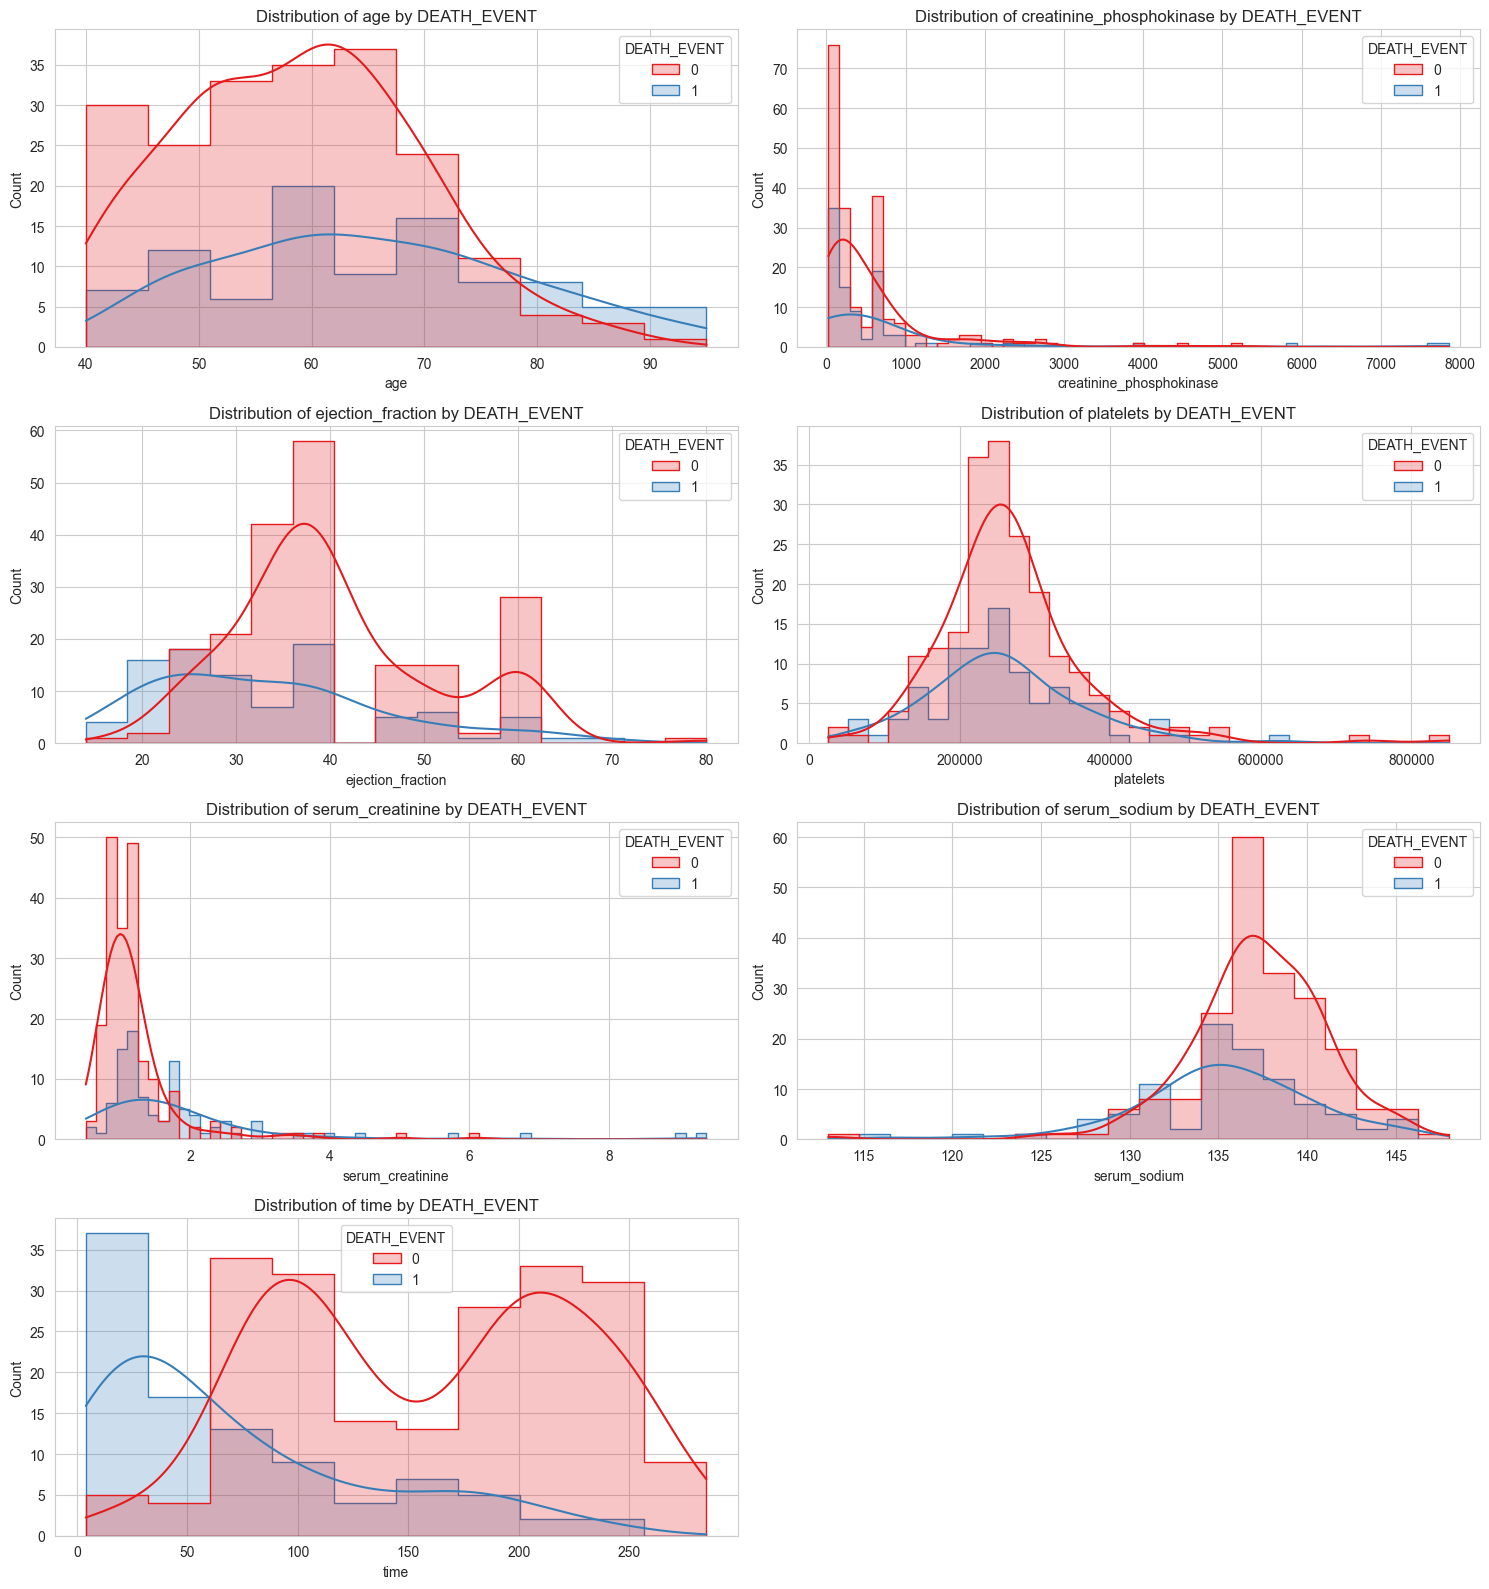

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

ouput_folder = "plots"

def plot_eda_distributions(data, target='DEATH_EVENT'):
    """
    Plot histograms with KDEs for all numerical features in the dataset,
    colored by the binary target variable.

    Parameters:
    - data: pandas DataFrame containing the dataset.
    - target: name of the binary target column to color by (default: 'DEATH_EVENT').
    """
    # Set plotting style
    sns.set_style(style="whitegrid")

    # Identify numerical columns excluding the target
    numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
    num_features = len(numerical_cols)

    # Calculate rows and columns for subplots
    n_cols = 2
    n_rows = (num_features + 1) // n_cols

    # Create subplots
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 4 * n_rows))
    axes = axes.flatten()

    for i, col in enumerate(numerical_cols):
        sns.histplot(data, x=col, kde=True, hue=target, ax=axes[i], palette="Set1", element="step")
        axes[i].set_title(f"Distribution of {col} by {target}")

    # Remove any extra axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()

    filepath = os.path.join(ouput_folder, "variables versus death event.png")
    plt.savefig(filepath, dpi = 300, bbox_inches = "tight")
    plt.show()

plot_eda_distributions(data, target='DEATH_EVENT')




In [66]:
death_event_distribution = data["DEATH_EVENT"].value_counts()
print(death_event_distribution)

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64


In [45]:
# what are the numbers of deceased and not deceased data
data["death"].value_counts(normalize=True) 

#the number of deceased is twice the number of not deceased



death
0    0.67893
1    0.32107
Name: proportion, dtype: float64

Text(0.5, 0, 'Age')

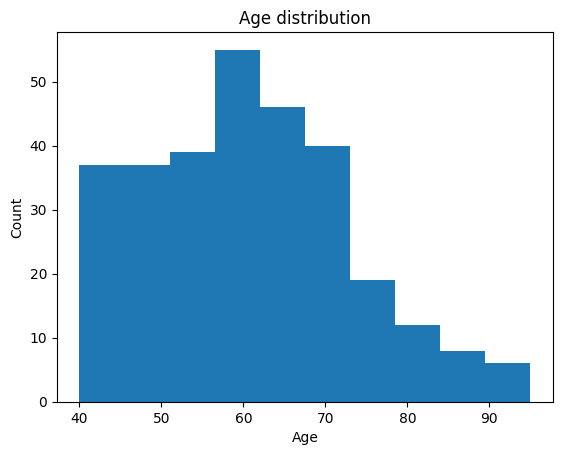

In [50]:
#what is the aged distribution of the observed data? 
plt.hist(data["age"], bins = 10, rwidth = 2)
plt.title("Age distribution")
plt.ylabel("Count")
plt.xlabel("Age")

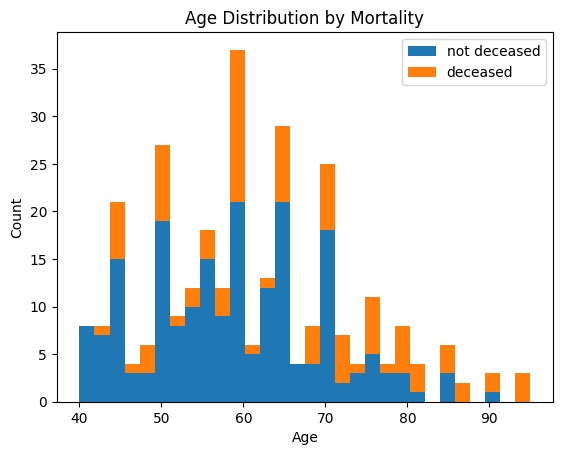

In [29]:
# I found interesting to know what is the age distribution of people with and without heart diesease. 
# plot with the raw data

import matplotlib.pyplot as plt

list1 = list()
outcomelabels = list()
labels = {0:"not deceased",1:"deceased"}
for outcome in data.death.cat.categories:
    list1.append(data[data["death"] == outcome]["age"])
    outcomelabels.append(labels[outcome])
h = plt.hist(list1, bins = 30, stacked = True, rwidth = 1, label = outcomelabels)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution by Mortality")
plt.legend(loc = "upper right")
plt.show()


<Figure size 1200x800 with 0 Axes>

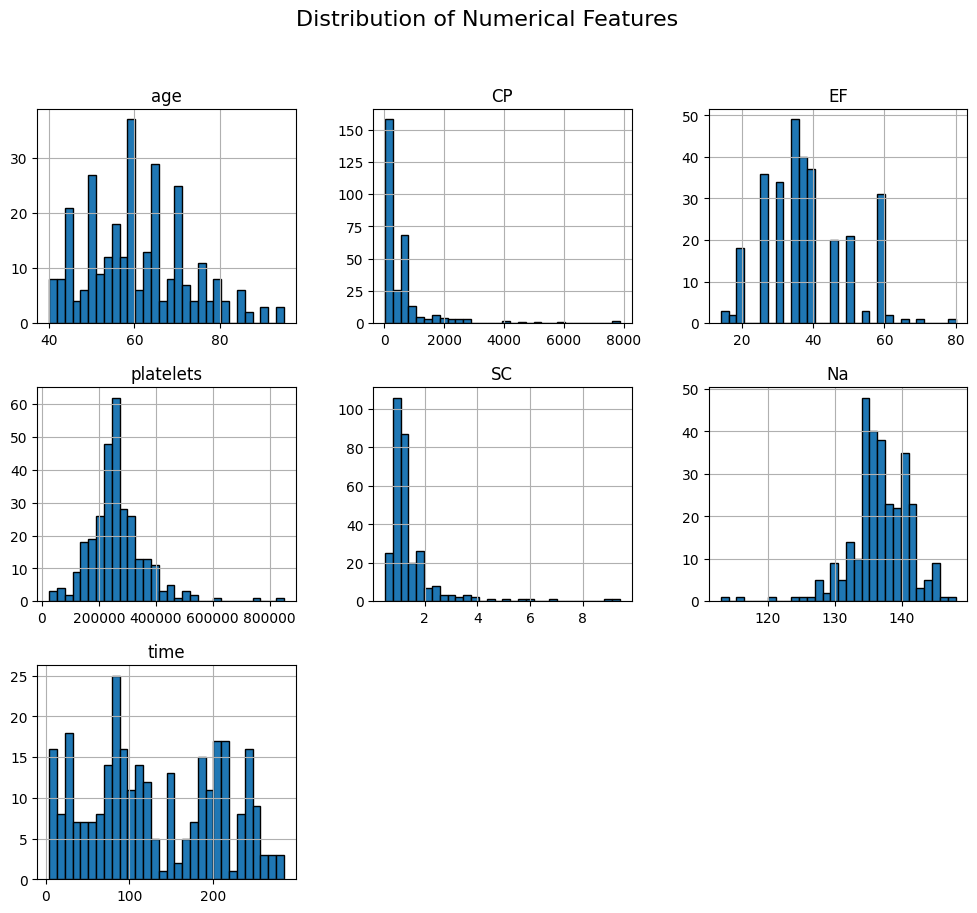

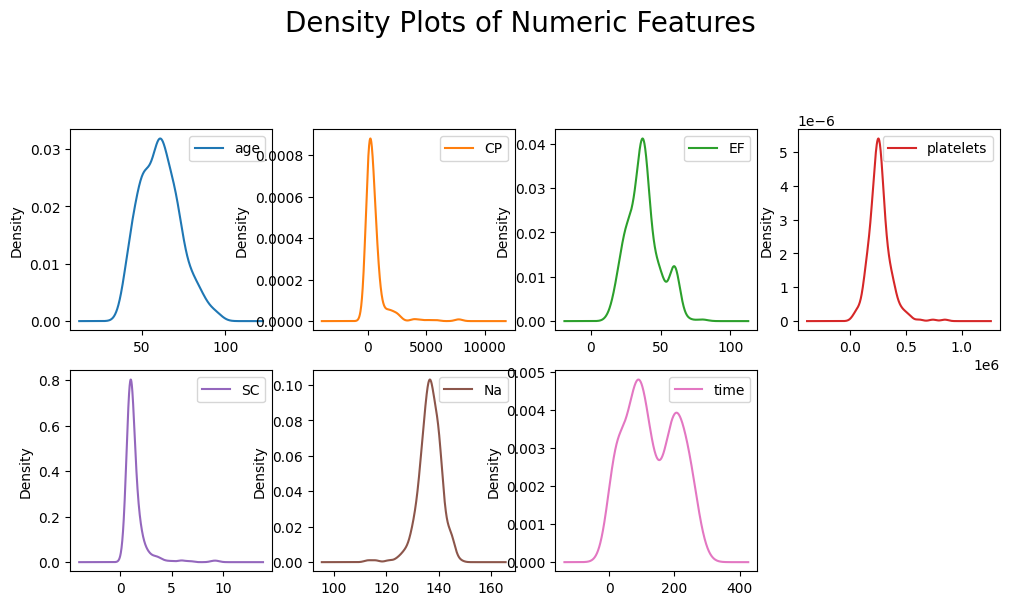

In [54]:
# make a correlation plot between the features
import matplotlib.pyplot as plt
import seaborn as sns
#set figure size
plt.figure(figsize=(12,8))

#plot histogram for each numerical column
data.hist(bins=30, figsize=(12,10), edgecolor="black")
plt.suptitle("Distribution of Numerical Features", fontsize = 16)
plt.show()

data.plot(kind="density", subplots=True, layout=(4,4), figsize=(12,12), sharex=False)
plt.suptitle("Density Plots of Numeric Features", fontsize = 20)
plt.show()

                               age   anaemia  creatinine_phosphokinase  \
age                       1.000000  0.088006                 -0.081584   
anaemia                   0.088006  1.000000                 -0.190741   
creatinine_phosphokinase -0.081584 -0.190741                  1.000000   
diabetes                 -0.101012 -0.012729                 -0.009639   
ejection_fraction         0.060098  0.031557                 -0.044080   
high_blood_pressure       0.093289  0.038182                 -0.070590   
platelets                -0.052354 -0.043786                  0.024463   
serum_creatinine          0.159187  0.052174                 -0.016408   
serum_sodium             -0.045966  0.041882                  0.059550   
sex                       0.065430 -0.094769                  0.079791   
smoking                   0.018668 -0.107290                  0.002421   
time                     -0.224068 -0.141414                 -0.009346   
DEATH_EVENT               0.253729  0.

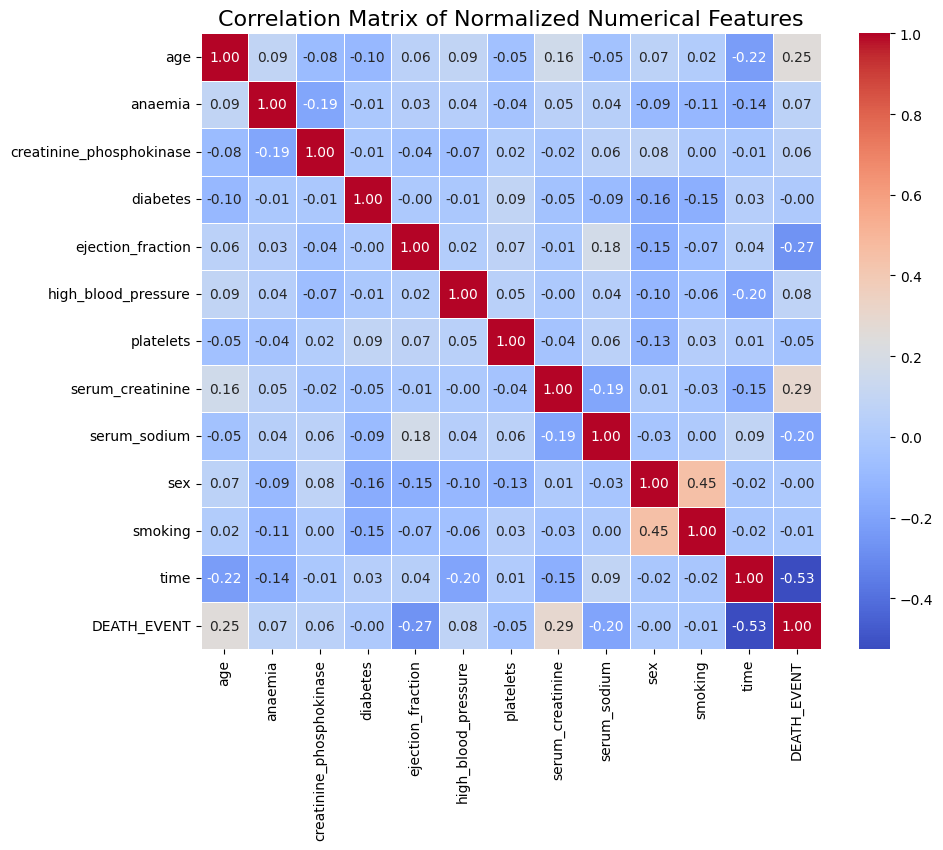

In [57]:
#NUMERICAL DATA

# normalize the data with standartscaler (actually there is no need for the normalization (the correlation function will take care about the normalisation)
# but for the practice I did the normalisation of numeric features

#copy data
norm_data = data.copy()
numeric_data = norm_data.select_dtypes(include="number").columns

#normalize only the numeric data columns using Standardscaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

norm_data[numeric_data]=scaler.fit_transform(norm_data[numeric_data])

#calculate the correlation matrix
correlation_matrix = norm_data.corr()
print(correlation_matrix)

#plot the correlation heatmap
#CAVE: the heatmap includes also the categorical data

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar = True, linewidths=0.5)
plt.title("Correlation Matrix of Normalized Numerical Features", fontsize =16)
plt.show()

In [56]:
# CATEGORICAL DATA

# chi-square for categorical features

from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest

X = data.iloc[:,:-1].values
X = data.select_dtypes(include=["category"])
y = data["death"]


#for chi2, features must be non-negative (usually integers)
X_encoded = X.copy()
for col in X_encoded.columns:
    if X_encoded[col].dtype == "category":
        le = LabelEncoder()
        X_encoded[col] = le.fit_transform(X_encoded[col])

chi_scores = chi2(X_encoded, y)
chi_data = pd.DataFrame({"Feature":X.columns, "Chi2 score": chi_scores[0], "p_value" : chi_scores[1]})
print(chi_data.sort_values(by = "Chi2 score", ascending=False))



#### non of the features is statistically dependent from the target feature (nor numeric neither categorical)

    Feature  Chi2 score       p_value
5     death  203.000000  4.625817e-46
2       HBP    1.221539  2.690589e-01
0   anaemia    0.746593  3.875569e-01
4   smoking    0.032347  8.572686e-01
3       sex    0.001956  9.647213e-01
1  diabetes    0.000657  9.795537e-01


In [57]:
chi_scores

(array([7.46593411e-01, 6.56814450e-04, 1.22153853e+00, 1.95626598e-03,
        3.23468288e-02, 2.03000000e+02]),
 array([3.87556925e-01, 9.79553740e-01, 2.69058926e-01, 9.64721312e-01,
        8.57268569e-01, 4.62581730e-46]))

In [61]:
# Feature selection using machine learning method:

#import all the necessary libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


#split the data into the training and the test set
#the independent features were already encoded, see above 

from sklearn.model_selection import train_test_split
X = norm_data.drop("death", axis=1)
y = norm_data["death"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 2)

# train simple linear regression
#choose a model

model = LogisticRegression()


#use RFE for feature selection
selector = RFE(model, n_features_to_select=5) #number of features is a adjustable 
selector = selector.fit(X_train, y_train)

#print the selected features
selected_features = X.columns[selector.support_]
print("Selected Features", selected_features)

#evaluate the model with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)

#print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with selected features: {accuracy:.4f}")

# Accuracy is 90% which is according to me just fine


Selected Features Index(['age', 'EF', 'SC', 'sex', 'time'], dtype='object')
Accuracy with selected features: 0.9000


In [66]:
# evaluate the model 
#train the model with the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 20, criterion = "entropy", random_state = 0)
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)

#Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy with selecte features: {accuracy:.4f}")

Model Accuracy with selecte features: 0.8833
